In [28]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [29]:
import random

In [140]:
def neighbors(loc):
    x, y = loc
    return [
        (x-1, y),
        (x+1, y),
        (x, y-1),
        (x, y+1),
    ]

In [142]:
import numpy as np
board=np.zeros((n+5,n+5))

TypeError: Required argument 'shape' (pos 1) not found

In [72]:
[random.randint(1,2) for _ in range(10)]

[2, 2, 1, 2, 1, 1, 1, 1, 1, 2]

In [144]:
def check_connected(board, start, end):
    reached=set(neighbors(start))
    not_explored=reached.copy()
    while True:
        if not not_explored:
            return False
        new=neighbors(not_explored.pop())
        
        unseen=set([x for x in new if x not in reached])
        if end in unseen:
            return True
        reached+=unseen
        not_explored+=unseen
    
    

In [147]:
def allowed(board, removed):
    adjs=(neighbors(removed))
    for i in len(adjs)-1:
        if not check_connected(board, adjs[i], adjs[i+1]):
            return False
    return True

In [ ]:
def update_edges(edges, removed):
    for cell in neighbors(removed):
        if not (neighbors(cell)):
            edges.remove(cell)


In [ ]:
def propose_move(board):
    while True:
        removed=np.randint(board.shape())
        if board[removed]:
            break
    update_edges(edges,removed)
    add_loc=np.randint(2*n+2)
    if add_loc>len(edges):
        step +=1
        
    added=random.choice(edges)
    board[added]=1
    board[removed]=0
    if allowed(board,removed):
        edges.remove(added)
        edges
    
    

In [95]:
def make_poly(k):
    spots = [(0, 0)]
    dead = []
    poly = [0]
    polyind = 0
    while len(poly) < k:
        curr = poly[polyind]
        loc = spots[curr]
        for spot in neighbors(loc):
            if spot not in spots:
                spots.append(spot)
        options = [i for i in range(curr, len(spots)) if i not in poly]
        if options:
            nex = random.choice(options)
            poly.append(nex)
            polyind = len(poly)-1
        else: # no valid next spot
            print(f"stuck at step {len(poly)} at spot {loc}")
            dead.append(polyind)
            while polyind in dead:
                polyind -= 1
    
    return spots, poly

In [62]:
def just_poly(k):
    spots, poly = make_poly(k)
    return [spots[i] for i in poly]

In [43]:
fail = True
j = 5
while fail:
    fail = False
    j += 1
    for i in range(10):
        print(i, j)
        if i > j:
            fail = True
            break
        

0 6
1 6
2 6
3 6
4 6
5 6
6 6
7 6
0 7
1 7
2 7
3 7
4 7
5 7
6 7
7 7
8 7
0 8
1 8
2 8
3 8
4 8
5 8
6 8
7 8
8 8
9 8
0 9
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
9 9


In [105]:
def draw_poly(spots, color='pink', size=3):
    #define Matplotlib figure and axis
    fig, ax = plt.subplots()
    fig.set_figwidth(size)
    fig.set_figheight(size)
    ax.axis('equal')
    ax.plot()

    for spot in spots:
        #add rectangle to plot
        ax.add_patch(Rectangle(spot, 1, 1,
                     edgecolor = 'black',
                     facecolor = 'pink',
                     fill=True,
                     lw=1))

    ax.add_patch(Rectangle(spots[0], 1, 1,
                 edgecolor = 'black',
                 facecolor = 'red',
                 fill=True,
                 lw=1))

    #display plot
    plt.show()

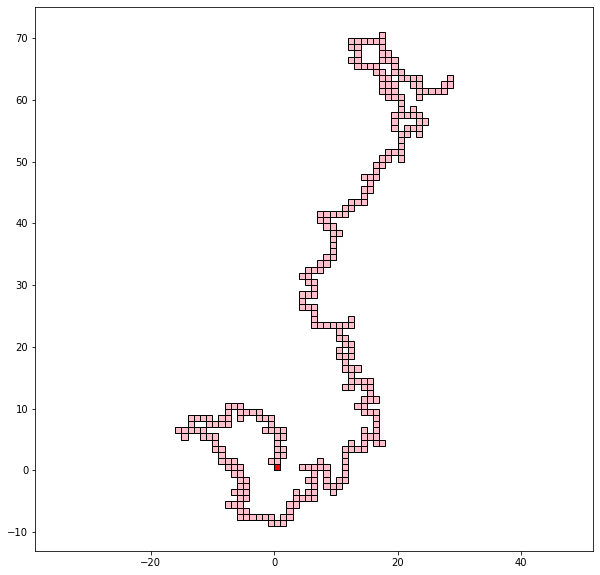

In [106]:
draw_poly(just_poly(300), size=10)

In [111]:
from collections import defaultdict
def tally(l):
    counts = defaultdict(lambda: 0)
    for x in l:
        counts[x] += 1
    return counts

In [138]:
res = [tuple(sorted(just_poly(4))) for _ in range(100000)]
t = tally(res)
print(len(t))
sorted(dict(t).items())

76


[(((-3, 0), (-2, 0), (-1, 0), (0, 0)), 843),
 (((-2, -1), (-2, 0), (-1, 0), (0, 0)), 827),
 (((-2, -1), (-1, -1), (-1, 0), (0, 0)), 1402),
 (((-2, -1), (-1, -1), (0, -1), (0, 0)), 1514),
 (((-2, 0), (-2, 1), (-1, 0), (0, 0)), 827),
 (((-2, 0), (-1, -1), (-1, 0), (0, 0)), 830),
 (((-2, 0), (-1, 0), (-1, 1), (0, 0)), 830),
 (((-2, 0), (-1, 0), (0, -1), (0, 0)), 705),
 (((-2, 0), (-1, 0), (0, 0), (0, 1)), 831),
 (((-2, 0), (-1, 0), (0, 0), (1, 0)), 502),
 (((-2, 1), (-1, 0), (-1, 1), (0, 0)), 2011),
 (((-2, 1), (-1, 1), (0, 0), (0, 1)), 2077),
 (((-1, -2), (-1, -1), (-1, 0), (0, 0)), 1373),
 (((-1, -2), (-1, -1), (0, -1), (0, 0)), 1571),
 (((-1, -2), (0, -2), (0, -1), (0, 0)), 2090),
 (((-1, -1), (-1, 0), (-1, 1), (0, 0)), 1362),
 (((-1, -1), (-1, 0), (0, -1), (0, 0)), 726),
 (((-1, -1), (-1, 0), (0, 0), (0, 1)), 851),
 (((-1, -1), (-1, 0), (0, 0), (1, 0)), 486),
 (((-1, -1), (0, -2), (0, -1), (0, 0)), 1498),
 (((-1, -1), (0, -1), (0, 0), (0, 1)), 1032),
 (((-1, -1), (0, -1), (0, 0), (1, 

(array([14., 17., 15.,  3.,  7.,  0., 11.,  1.,  2.,  6.]),
 array([ 485.,  724.,  963., 1202., 1441., 1680., 1919., 2158., 2397.,
        2636., 2875.]),
 <a list of 10 Patch objects>)

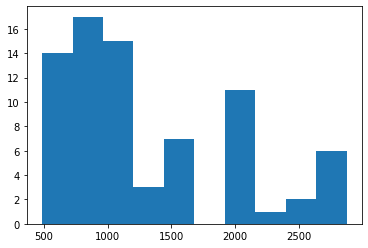

In [137]:
plt.hist(list(t.values()))

(array([12., 19., 15.,  3.,  7.,  0., 12.,  0.,  2.,  6.]),
 array([ 486. ,  724.8,  963.6, 1202.4, 1441.2, 1680. , 1918.8, 2157.6,
        2396.4, 2635.2, 2874. ]),
 <a list of 10 Patch objects>)

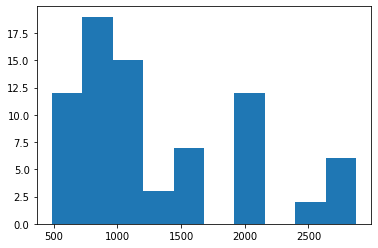

In [139]:
plt.hist(list(t.values()))

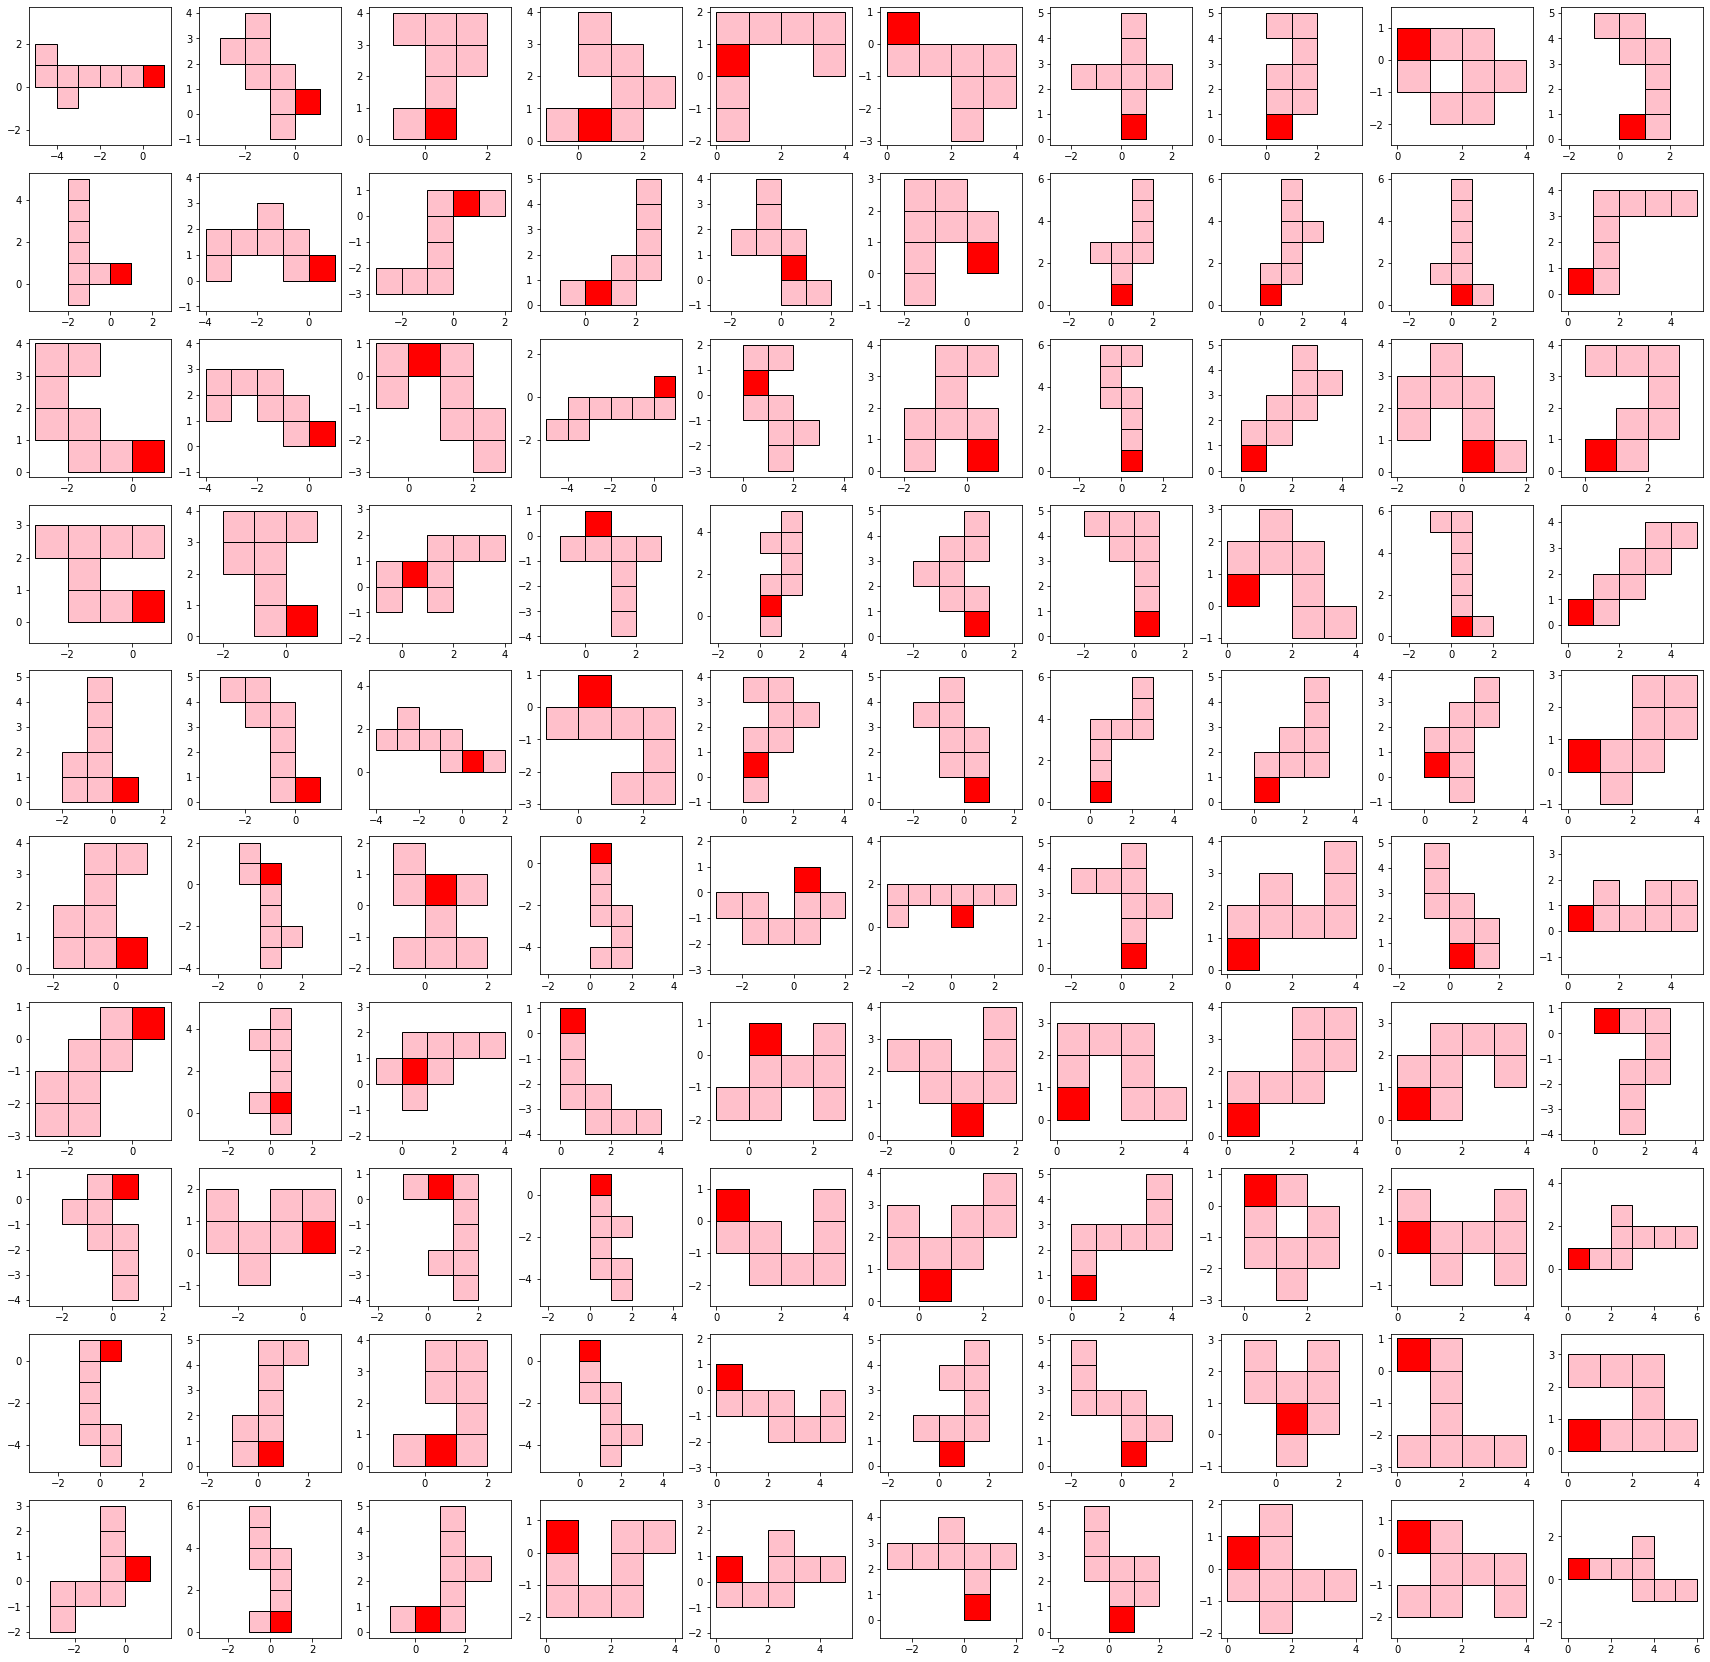

In [110]:
res = [just_poly(8) for _ in range(100)]
res = sorted(res)
size=30
color='pink'

#define Matplotlib figure and axis
fig, axs = plt.subplots(10, 10)
fig.set_figwidth(size)
fig.set_figheight(size)

for i, spots in enumerate(res):
    ax = axs[i%10][i//10] 
    ax.axis('equal')
    ax.plot()

    for spot in spots:
        #add rectangle to plot
        ax.add_patch(Rectangle(spot, 1, 1,
                     edgecolor = 'black',
                     facecolor = 'pink',
                     fill=True,
                     lw=1))

    ax.add_patch(Rectangle(spots[0], 1, 1,
                 edgecolor = 'black',
                 facecolor = 'red',
                 fill=True,
                 lw=1))
#display plot
plt.show()